March 14, 2016

My π Day Obsession
==================

The mathematician Euler proved this relationship:

￼$$\sum_\limits{n = 1}^{\infty} \frac{1}{n^s}  = \prod_{p\ prime} \frac{1}{1 - p^{-s}} $$

It is called the Euler Product Formula and it means that the sum of a function of counting numbers is equal to the product of a function of the sequence of prime numbers.

For the case where s = 2, (the Basel Problem) the sum converges to:

￼$$\sum_\limits{n = 1}^{\infty} \frac{1}{n^2}  = \prod_{p\ prime} \frac{\pi^{2}}{6} $$

Given this, now we can see that the product of a function of the sequence of primes is related to π. How cool is that?! 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from math import pi,sqrt

pd.options.display.float_format = '{:,.9f}'.format

In [3]:
primes_url = "http://primes.utm.edu/lists/small/10000.txt"
primes_text = requests.get(primes_url).text.split('\n')
reading_primes = False
primes = []
for l in primes_text:
    #print(l)
    if not reading_primes:
        if l.strip() == "":
            reading_primes = True
    else:
        if l.strip() == "end.":
            break
        vals = l.split()
        primes += [int(x) for x in vals]
print("%d primes"%(len(primes)))     

10000 primes


In [4]:
approx_pis = []
delta_pis = []
product = 1
for p in primes:
    product *= 1.0/(1.0 - (1.0/(p*p)))
    approx_pi = sqrt(6*product)
    approx_pis.append(approx_pi)
    delta_pis.append(pi-approx_pi)

In [5]:
df = pd.DataFrame({'approx_pi':approx_pis,'delta_pi':delta_pis})

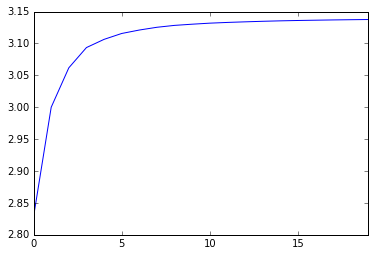

In [6]:
# See how they converge at the start...
df['approx_pi'][:20].plot()

In [7]:
# see how close they get at the end...
print("pi = %.9f"%(pi))
df.tail(20)

pi = 3.141592654


,approx_pi,delta_pi
9980,3.141591452,0.000001202
9981,3.141591452,0.000001202
9982,3.141591452,0.000001201
9983,3.141591452,0.000001201
9984,3.141591452,0.000001201
9985,3.141591453,0.000001201
9986,3.141591453,0.000001201
9987,3.141591453,0.000001201
9988,3.141591453,0.000001201
9989,3.141591453,0.000001200
